In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np 
from ipykernel import kernelapp as app
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV, KFold,cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import optuna
import sklearn
from sklearn import datasets
from sklearn.svm import SVR
import optuna 
import shap
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('10data.csv')

data = df.values

X_features = data[:,0:-1]
Y_properties = data[:,-1]

# standard
mean = Y_properties.mean()
scale = 10**int(np.log10(mean))
Y_properties /= scale
mean = Y_properties.mean()
std = Y_properties.std()
Zs = (Y_properties-mean)/std
mask = (Zs<3) & (Zs>-3)

X_features = X_features[mask.ravel(),:]
Y_properties = Y_properties[mask].ravel()
a10 = ['Al','As','B','Ba','Bi','Cd','Cu','Dy','Er','Fe','Ga','Gd','Ge','In','K','La','Mn','Na','P','Pb','Pr','S','Sb','Se','Si','Sn','Tb','Te','Tl','Xe','Zn']
X = pd.DataFrame(data = X_features,columns = a10)
Y = pd.DataFrame(data = Y_properties, columns = ['Tg'])

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2, random_state=33)

kfold = KFold(n_splits=6, shuffle=True,random_state=42)

In [13]:
model_rf =  XGBRegressor(objective="reg:squarederror")  
model_rf.fit(X_train,Y_train)
scores2 = r2_score(model_rf.predict(X_train),Y_train)
scores2

0.9549401014863281

In [17]:
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X_test)

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xff in position 342: invalid start byte

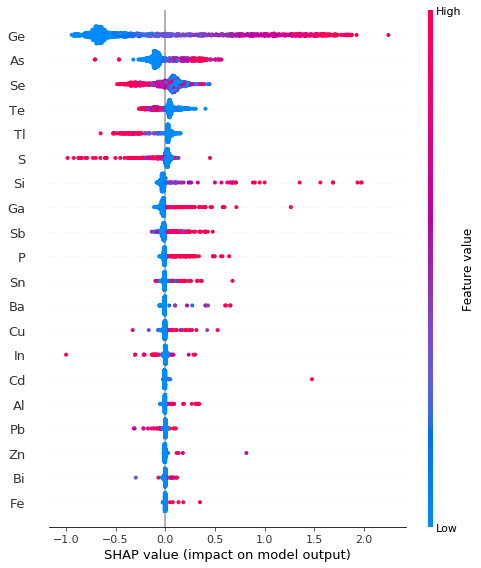

In [11]:
shap.summary_plot(shap_values, X_test)

In [ ]:
import shap.plots
shap.initjs()


In [ ]:
a = shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])
a

In [ ]:
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])
top_inds = np.argsort(-np.sum(np.abs(shap_values), 0))

# make SHAP plots of the three most important features
for i in range(20):
    shap.dependence_plot(top_inds[i], shap_values, X_test)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])